# Train-Test Set  & Null Model

En este notebook vamos a crear los data sets correspondientes a train y a test. Además se va a entrenar el modelo nulo para tener una primera visión del caso de estudio.

- Libraries Import
- Data Import
- Data Scale
- Train & Test set
- Balance set
- __NULL MODEL__
    - Function 
    - Training
    - Confussion Matrix
    - Accuracy
    - ROC Curve
- References
__Importamos todas las librerías que se van a utilizar en este notebook:__

In [6]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt # plots
import seaborn as sns # plots
from sklearn.ensemble import IsolationForest
from sklearn import preprocessing 
from sklearn.linear_model import Lasso, LassoCV
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression # Log Regression
from sklearn.metrics import classification_report, confusion_matrix 

from sklearn import datasets, metrics, model_selection


__Importamos los datos:__

In [7]:
path = ('../data/03_processed/final_df.csv')
final_df = pd.read_csv(path)

__Escalamos los datos:__

In [8]:
scaler = MinMaxScaler()  # escalamos los datos                                     
df_scaled = pd.DataFrame(scaler.fit_transform(final_df), columns = final_df.columns) # trasformamos a df los datos escalados
df_scaled.head()

,Unnamed: 0,num_sats,home_ownership_RENT,mo_sin_rcnt_rev_tl_op,funded_amnt_inv,open_rv_12m,num_rev_tl_bal_gt_0,acc_open_past_24mths,total_cu_tl,open_acc,...,home_ownership_OWN,mths_since_recent_revol_delinq,total_rev_hi_lim,mths_since_rcnt_il,delinq_amnt,application_type_Joint App,purpose_housing,total_il_high_credit_limit,open_il_12m,target
0,0.000000,0.222222,0.0,0.008065,0.273018,0.095238,0.200000,0.125000,0.088235,0.222222,...,1.0,1.0,0.00376,0.079882,0.0,0.0,0.0,0.057363,0.000000,0.0
1,0.000002,0.044444,1.0,0.037634,0.161125,0.000000,0.044444,0.031250,0.000000,0.044444,...,0.0,1.0,0.00036,0.062130,0.0,0.0,0.0,0.001903,0.000000,0.0
2,0.000004,0.211111,0.0,0.008065,0.168798,0.047619,0.244444,0.203125,0.117647,0.211111,...,0.0,1.0,0.00857,0.020710,0.0,0.0,0.0,0.015338,0.083333,0.0
3,0.000006,0.166667,1.0,0.016129,0.232737,0.095238,0.155556,0.109375,0.000000,0.166667,...,0.0,1.0,0.00287,0.026627,0.0,0.0,0.0,0.002617,0.083333,0.0
4,0.000009,0.044444,0.0,0.013441,0.335038,0.095238,0.022222,0.078125,0.000000,0.044444,...,0.0,1.0,0.00030,0.020710,0.0,0.0,0.0,0.014425,0.083333,0.0


Eliminamos la primera fila importada

In [9]:
del df_scaled['Unnamed: 0'] # eliminamos la primera columna que se ha añadido

In [10]:
df_scaled = df_scaled.loc[:, ['num_tl_30dpd',
 'tot_hi_cred_lim',
 'revol_bal',
 'purpose_debt_consolidation',
 'home_ownership_ANY',
 'max_bal_bc',
 'total_cu_tl',
 'open_rv_24m',
 'num_tl_120dpd_2m',
 'open_il_12m',
 'mo_sin_rcnt_rev_tl_op',
 'num_il_tl',
 'id',
 'dti',
 'num_tl_90g_dpd_24m',
 'funded_amnt',
 'purpose_credit_card',
 'open_acc_6m',
 'inq_last_6mths',
 'application_type_Joint App',
 'mort_acc',
 'policy_code',
 'percent_bc_gt_75',
 'mths_since_recent_bc_dlq',
 'term_ 60 months',
 'mths_since_recent_bc',
 'num_accts_ever_120_pd',
 'last_fico_range_low',
 'purpose_medical',
 'installment',
 'collections_12_mths_ex_med',
 'open_il_24m',
 'fico_range_high',
 'verification_status_Verified',
 'purpose_housing',
 'mths_since_recent_revol_delinq',
 'total_bal_ex_mort',
 'num_sats',
 'home_ownership_MORTGAGE',
 'mths_since_last_record',
 'pub_rec',
 'delinq_amnt',
 'num_bc_tl',
 'mths_since_rcnt_il',
 'target']]

Nombramos y seleccionamos las variables predictoras y la variable target:

In [5]:
predictiveVariables = df_scaled.loc[:, df_scaled.columns != 'target'] #serán todas menos la varoables target

target = df_scaled['target']                                          # es la variable 'target' de la bbdd importada

Para hacer la regresión logística y el resto de los modelos tenemos que dividir el conjunto de datos en dos partes, train y test.
Del EDA sabemos que el conjunto de datos está desequilibrado, tenemos casos casos de no default y unos pocos casos de default en comparación. Para resolver ese problema, aplicaremos un método de sobremuestreo llamado Smote. La función Smote crea muestras sintéticas de la clase minoritaria haciendo que la clase minoritaria sea igual a la mayoritaria. Para ello, Smote selecciona registros similares.

__Creación de Train & Test Set y se balancea la muestra__

In [7]:
%%time

# Separamos en train y test
X_train, X_test, Y_train, Y_test = train_test_split(predictiveVariables, target, test_size=0.20, random_state=1)

# Utilizamos smote para igular la muestra 
sm = SMOTE(random_state=1,sampling_strategy = 0.4)

# solo se realiza smote sobre la parte train set
X_train, Y_train = sm.fit_sample(X_train, Y_train) 


print(X_train.shape); print(X_test.shape); print(Y_train.shape); print(Y_test.shape)

(386932, 44)
(92439, 44)
(386932,)
(92439,)
Wall time: 4min 25s


Comprobamos que los datos de las variables predictoras y las variables predictoras son iguales

__Pasamos los datos a la carpeta de los datos procesados para utilizar lso mismos datos en todos los modelos:__

In [8]:
X_train.to_csv('../data/03_processed/x_train.csv')

In [9]:
X_test.to_csv('../data/03_processed/x_test.csv')

In [10]:
Y_train.to_csv('../data/03_processed/y_train.csv')

In [11]:
Y_test.to_csv('../data/03_processed/y_test.csv')

Comprobamos que ahora están repartidos de igual manera las dos opciones de la variable target

In [12]:
ytrain_df = pd.DataFrame(Y_train, columns = ['target'])
ytest_df = pd.DataFrame(Y_test, columns = ['target'])

In [13]:
ytrain_df['target'].value_counts(normalize=True)

0.0    0.714286
1.0    0.285714
Name: target, dtype: float64

La funcionado la función SMOTE y haya  cantidad de muestras 1 en la variable target.

In [14]:
ytest_df['target'].value_counts(normalize=True)

0.0    0.747953
1.0    0.252047
Name: target, dtype: float64

## Modelo Nulo:

Este es el modelo más secillo, que simplemente devolverá el valor más probable para cada observación. en este caso vemos que el valor más probable para la variable target es: 0

In [21]:
# función del modelo
null_model = DummyClassifier(strategy = 'most_frequent', random_state = 123)

# Entrenamiento del modelo con dataset TRAIN
null_model.fit(X_train, Y_train) 

DummyClassifier(random_state=123, strategy='most_frequent')

__Matriz de Confusión & Accuracy:__

Primero definimos una función para crear la matriz de confusión, que nos será útil para el resto de modelos

In [28]:
dummy_accuracy = null_model.score(X_test, Y_test)
dummy_accuracy 

0.7479527039453044

Observamos que la accuracy del modelo devuelve el mismo porcentaje que el de valores 1 de target. Esto es porque ha predecido correctamente todos estos valores, pero sin embargo a los valores 1 tammbién los ha predecido con 0.

### Curva ROC:

Una curva ROC (curva de característica operativa del recepto) es un gráfico que muestra el rendimiento de un modelo de clasificación en todos los umbrales de clasificación. Esta curva representa dos parámetros:
 - Tasa de verdaderos positivos
 - Tasa de falsos positivos
 
__El AUC__ proporciona una medición agregada del rendimiento en todos los umbrales de clasificación posibles. Una forma de interpretar el AUC es como la probabilidad de que el modelo clasifique un ejemplo positivo aleatorio más alto que un ejemplo negativo aleatorio.

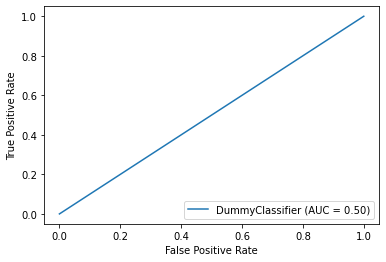

Logistic Regression score train:  0.7142857142857143
Logistic Regression score:  0.7479527039453044


In [29]:
metrics.plot_roc_curve(null_model, X_test, Y_test)                             # CURVA ROC
plt.show()                     
print("Logistic Regression score train: ", null_model.score(X_train, Y_train)) # score train
print("Logistic Regression score: ", null_model.score(X_test, Y_test))         # score test

Con esta curva roc observamos que la capacidad discriminatoria del modelo es arbitraria, ya que al asignar el valor de la variabe target más frecuente idistintamente la capacidad discriminatoria del modelo es del 50%.

__Guardamos el modelo entrenado para poder volver a utilizarlo más adelante y que ya esté entrenado:__

In [30]:
def save_models(filename, model):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

In [32]:
save_models('../data/04_models/null_model.pkl', null_model)

### Referencias

- https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce
- https://machinelearningmastery.com/naive-bayes-for-machine-learning/
- https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
- https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html
- https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=es-419


